In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv',encoding='latin1')
print(df)
print(df.shape)

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           A

In [3]:
df.replace("", np.nan, inplace=True)
df.dropna(inplace=True)
print(df.shape)

(5659, 10)


In [4]:
df = df.drop(columns=['Name'])
print(df)

         Year Duration                      Genre  Rating  Votes  \
1      (2019)  109 min                      Drama     7.0      8   
3      (2019)  110 min            Comedy, Romance     4.4     35   
5      (1997)  147 min     Comedy, Drama, Musical     4.7    827   
6      (2005)  142 min        Drama, Romance, War     7.4  1,086   
8      (2012)   82 min  Horror, Mystery, Thriller     5.6    326   
...       ...      ...                        ...     ...    ...   
15493  (2015)  115 min                      Drama     6.1    408   
15494  (2001)  153 min  Biography, Drama, History     6.2  1,496   
15503  (1989)  125 min       Action, Crime, Drama     5.8     44   
15505  (1999)  129 min              Action, Drama     4.5    655   
15508  (1998)  130 min              Action, Drama     6.2     20   

              Director          Actor 1                 Actor 2  \
1        Gaurav Bakshi     Rasika Dugal          Vivek Ghamande   
3           Ovais Khan          Prateik          

In [5]:
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [6]:

for column in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[column] = df[column].astype('category').cat.codes
    df[column] = df[column].astype(int)

print(df)
print(df.shape)

         Year  Duration                      Genre  Rating  Votes  Director  \
1      (2019)       109                      Drama     7.0      8       629   
3      (2019)       110            Comedy, Romance     4.4     35      1335   
5      (1997)       147     Comedy, Drama, Musical     4.7    827      1530   
6      (2005)       142        Drama, Romance, War     7.4  1,086      2044   
8      (2012)        82  Horror, Mystery, Thriller     5.6    326       135   
...       ...       ...                        ...     ...    ...       ...   
15493  (2015)       115                      Drama     6.1    408      1223   
15494  (2001)       153  Biography, Drama, History     6.2  1,496      2059   
15503  (1989)       125       Action, Crime, Drama     5.8     44      1793   
15505  (1999)       129              Action, Drama     4.5    655      1025   
15508  (1998)       130              Action, Drama     6.2     20       895   

       Actor 1  Actor 2  Actor 3  
1         1352  

In [7]:
df.dropna(subset=['Year'], inplace=True)

# Convert 'Year' from string to int
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)

print(df)

       Year  Duration                      Genre  Rating  Votes  Director  \
1      2019       109                      Drama     7.0      8       629   
3      2019       110            Comedy, Romance     4.4     35      1335   
5      1997       147     Comedy, Drama, Musical     4.7    827      1530   
6      2005       142        Drama, Romance, War     7.4  1,086      2044   
8      2012        82  Horror, Mystery, Thriller     5.6    326       135   
...     ...       ...                        ...     ...    ...       ...   
15493  2015       115                      Drama     6.1    408      1223   
15494  2001       153  Biography, Drama, History     6.2  1,496      2059   
15503  1989       125       Action, Crime, Drama     5.8     44      1793   
15505  1999       129              Action, Drama     4.5    655      1025   
15508  1998       130              Action, Drama     6.2     20       895   

       Actor 1  Actor 2  Actor 3  
1         1352     2272      319  
3    

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer
genre_dummies = df['Genre'].str.get_dummies(sep=', ')
df = pd.concat([df, genre_dummies], axis=1)
df.drop(columns=['Genre'], inplace=True)

In [9]:
df.dropna(inplace=True)
print(df.shape)
print(df)

(5659, 30)
       Year  Duration  Rating  Votes  Director  Actor 1  Actor 2  Actor 3  \
1      2019       109     7.0      8       629     1352     2272      319   
3      2019       110     4.4     35      1335     1198      719     2148   
5      1997       147     4.7    827      1530      378       75     2045   
6      2005       142     7.4  1,086      2044      692     1112     2524   
8      2012        82     5.6    326       135     1934     1175     1013   
...     ...       ...     ...    ...       ...      ...      ...      ...   
15493  2015       115     6.1    408      1223     1861     1801     1615   
15494  2001       153     6.2  1,496      2059      763     1619     1184   
15503  1989       125     5.8     44      1793      406      754     1685   
15505  1999       129     4.5    655      1025      112     2164      314   
15508  1998       130     6.2     20       895      468      753      303   

       Action  Adventure  ...  Music  Musical  Mystery  News  Ro

In [10]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
print(df.dtypes)

Year             int64
Duration         int64
Rating         float64
Votes            int64
Director         int64
Actor 1          int64
Actor 2          int64
Actor 3          int64
Action           int64
Adventure        int64
Animation        int64
Biography        int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Family           int64
Fantasy          int64
History          int64
Horror           int64
Music            int64
Musical          int64
Mystery          int64
News             int64
Romance          int64
Sci-Fi           int64
Sport            int64
Thriller         int64
War              int64
Western          int64
dtype: object


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(['Rating'], axis=1)  # Features
y = df['Rating']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

average_rating = y.mean()
print(f'Average Rating: {average_rating}')

MAE: 0.8371863957597173
Average Rating: 5.898533309772045


In [14]:
accuracy_percentage = (1 - (mae / average_rating)) * 100
print(f'Accuracy Percentage: {accuracy_percentage:.2f}%')

Accuracy Percentage: 85.81%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

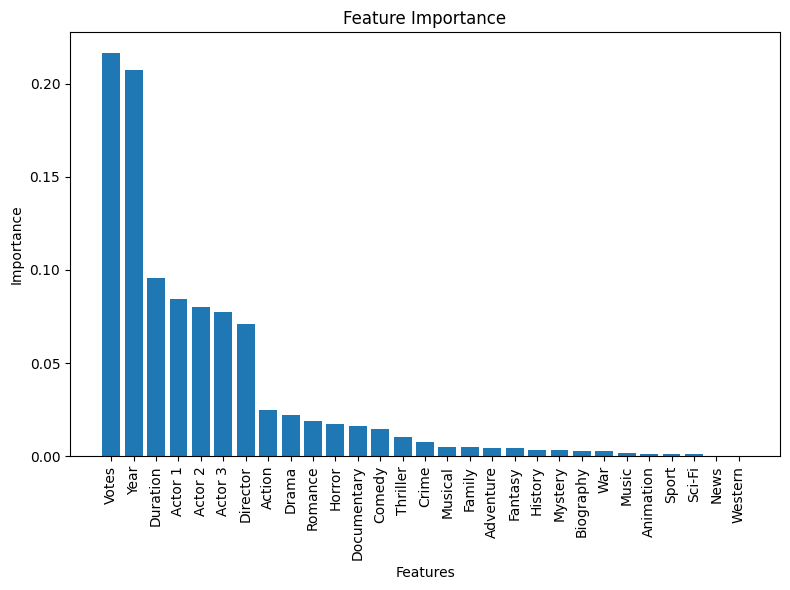

In [ ]:
plt.figure(figsize=(8,6))
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

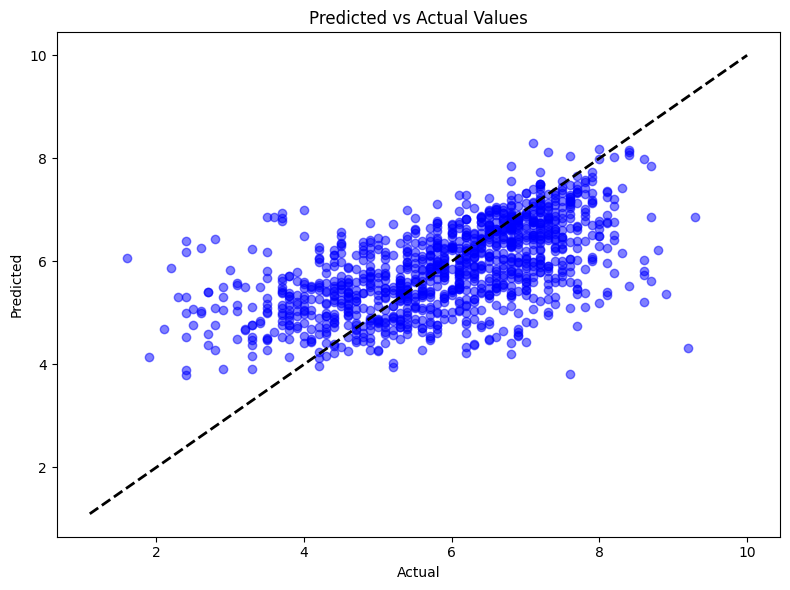

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()

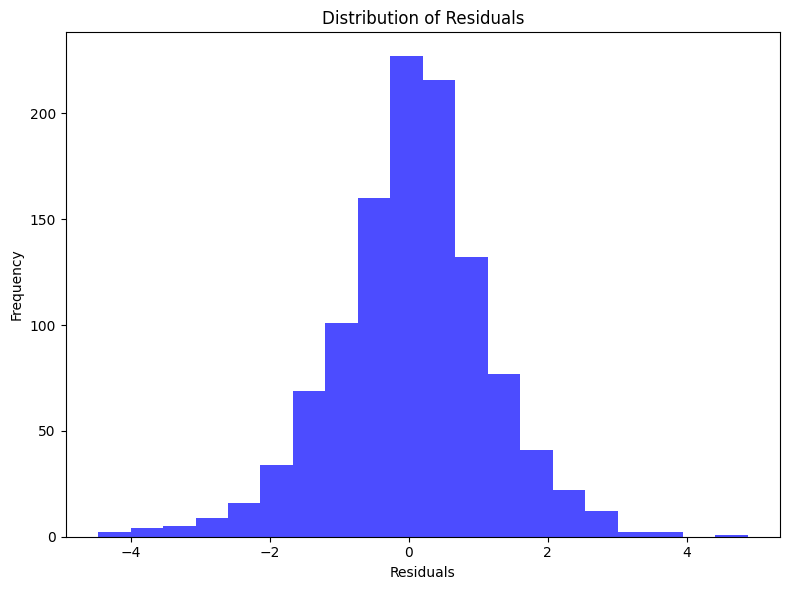

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

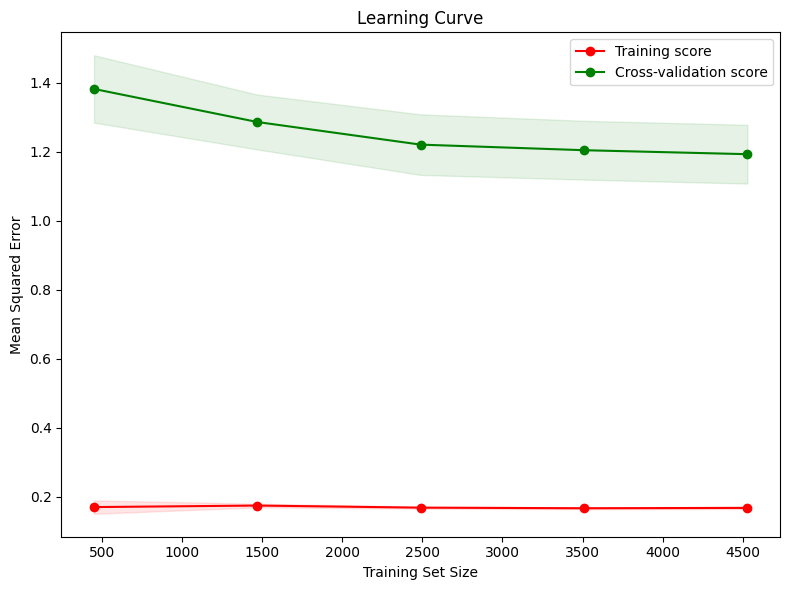

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd

# Create a DataFrame to display the first few comparisons between actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Display the first 10 rows
print(comparison_df.head(10))


       Actual  Predicted
10971     6.0      5.016
14052     2.4      6.187
10002     3.8      4.862
3970      3.8      4.764
8840      7.2      5.942
5071      6.3      5.887
2709      8.6      5.205
11842     3.9      5.352
10910     6.6      5.146
4485      6.6      6.902
